# ANN Building Blocks part 2

## Learning

### Linear regression ($\approx$ single *linear* neuron)
- closed form solution 


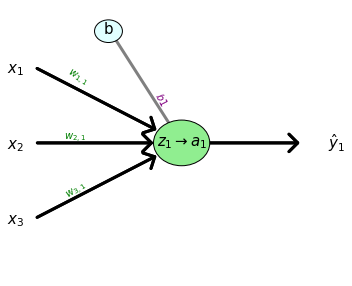

In [13]:
import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'common_assets')))
import numpy as np
import matplotlib.pyplot as plt
from draw_neural_net import draw_neural_net

layer_sizes = [3,1,1]

weights = [
    np.array(
        [
            ["w_{1,1}"],
            ["w_{2,1}"], 
            ["w_{3,1}"],
        ]
    ),
    np.array(
        [
            [""]
        ]
    )

]
biases = [
    np.array(
        ["b1"]
    ), 
    np.array(
        ["b_2"]
    )
]
fig = plt.figure(figsize=(6, 5))
ax = fig.gca()
ax.axis('off')

draw_neural_net(ax,
                layerSizes=layer_sizes, 
                weights=weights, 
                biases=biases, 
                hiddenLayerPrefix = "", 
                outLayerPrefix = "", 
                inLayerPrefix ="", 
                biasNodePrefix = "b",
                #inPrefix = "x", 
                #outPrefix = "\hat{}", 
                otherNodePrefix =  r"z_{m}\rightarrow a_{m}",
                hideInOutPutNodes=True,
                nodeFontSize = 15,
                edgeFontSize = 10, 
                edgeWidth = 3
               )

### ANN (arbitrary number of  neurons in layers)
- closed form does not work
- iterative optimization algorithm (=Learning)

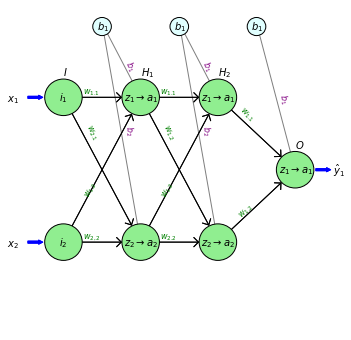

In [6]:
layer_sizes = [2, 2, 2, 1]
weights = [
    np.array(
        [
        
            [ "w_{1.1}",  "w_{2.1}" ],
            [ "w_{1.2}",  "w_{2,2}" ]
        ]
    ),
    np.array(
        [
            [ "w_{1.1}",  "w_{1.2}" ],
            [ "w_{1.2}",  "w_{2.2}" ]
        ]
    ),
    np.array(
        [
            [ "w_{1.1}" ],
            [ "w_{1.2}" ]
        ]
    )
]
biases = [
    np.array(
        [ "b_1",  "b_2" ]
    ), 
    np.array(
        [ "b_1" ,  "b_2" ]
    ),
    np.array(
        [ "b_1" ]
    )
    
]

fig = plt.figure(figsize=(6, 6))

ax = fig.gca()
ax.axis('off')

draw_neural_net(ax, 
                layerSizes=layer_sizes,
                weights= weights, 
                biases=biases,
                nodeFontSize = 10,
                edgeFontSize = 8)


#  Supervised Learning

## Aim
Find optimal values of $w_{\cdot,j}$ and $b_j$ over all neurons $j$

## Tools
* Loss function 
   + (equiv. Cost/Error Function)
* Gradient descent
  + Back-propagation
* Cross-validation
    - Data
        - Training set
            - for learning
        - Validation set
            - know when to stop
        - Test set
            - quality control



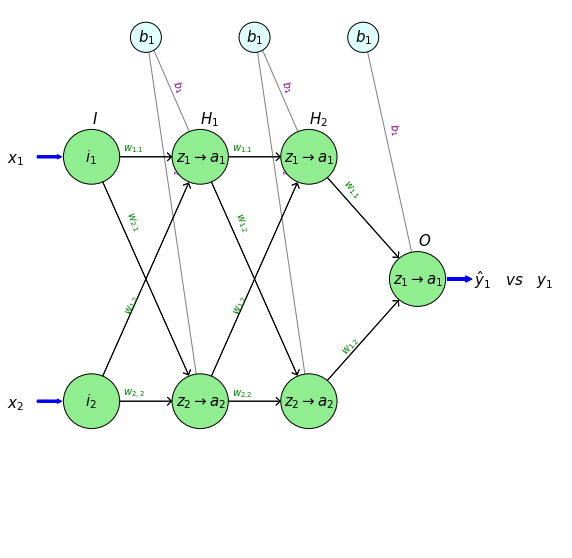

In [10]:
fig

-  $x$ = input 
- $y$ **known** output corresponding to $x$
- (Recall: $\hat{y}$ is the **estimated** output)

# Cross-validation

Split data into 
1. training set
    - use in gradient descent during learning
2. validation set
    - evaluate progress/convergence during learning
3. test set
    - evaluate final result after learning



# Loss Function 

Suppose we have

1. an ANN that, with input $x$, produces an estimated output $\hat{y}$ 
2. training samples $X=(x^{(1)},\ldots,x^{(K)})$ with true output values $Y=(y^{(1)},\ldots,y^{(K)})$. 

Then the **Quadratic Loss Function** is defined as follows:
<br><br><br><br><br>
<br><br><br><br><br>
<br><br><br><br>

# Loss Function 

Suppose we have

1. an ANN that, with input $x$, produces an estimated output $\hat{y}$ 
2. training samples $X=(x^{(1)},\ldots,x^{(K)})$ with true output values $Y=(y^{(1)},\ldots,y^{(K)})$. 

Then the **Quadratic Loss Function** is defined as follows:

1, For each $x\in X$, use the residual sum of squares, *RSS*, as an error measure

$\begin{eqnarray*}L(w,b|x) &=& \sum_i\frac{1}{2} \left(y_i-\hat{y}_i\right)^2\end{eqnarray*}$

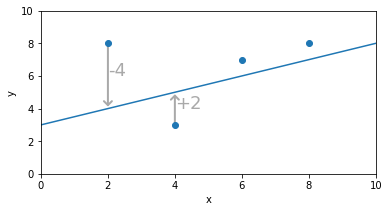

In [14]:
import random
from matplotlib import patches as mpatches

# Creating vectors x and  
a = 3
b = 0.5
n = 50
z = np.linspace(0, 10, n) 
w = [ a + b * zi for zi in z ] 

x = [ 2,4,6,8 ]
y = [ 8,3,7,8 ]

fig = plt.figure(figsize = (6, 3))
# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('x') 
plt.ylabel('y') 
plt.plot(z, w)
plt.xlim((0,10))
plt.ylim((0,10))
plt.annotate("", xy=(2,4), xytext=(2,8),  
             arrowprops=dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=0.4,
                                                head_width=0.4),
                 color="darkgray", lw=2))
plt.text(2, 6, "-4", fontsize=18, color="darkgray", zorder=0)

plt.annotate("", xy=(4,5), xytext=(4,3),  
             arrowprops=dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=0.4,
                                                head_width=0.4),
                 color="darkgray", lw=2))
plt.text(4, 4, "+2", fontsize=18, color="darkgray", zorder=0)

#arrows(x1=2,y1=4,x0=2,y0=8, col="darkgray",lwd=5)
#text(x=2, y=6, labels="-4", cex=2, pos=4, col="darkgray")
#arrows(x1=4,y1=5,x0=4,y0=3, col="darkgray", lwd=5)
#text(x=4, y=4, labels="-2", cex=2, pos=4, col="darkgray")

# Show the plot 
plt.show() 

2, The full quadratic cost function is  simply the Mean Squared Error (MSE) used in cross-validation
$\begin{eqnarray}
L(w,b) &=&  \frac{1}{K} \sum_{k=1}^K L(w,b|x^{(k)})\\
%&=& \frac{1}{2K}\sum_{k=1}^K \Vert Y(x_k)-a^{(L)}(X_k)\Vert ^2
\end{eqnarray}$


# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Hill-climbing* 
<br>
<br>

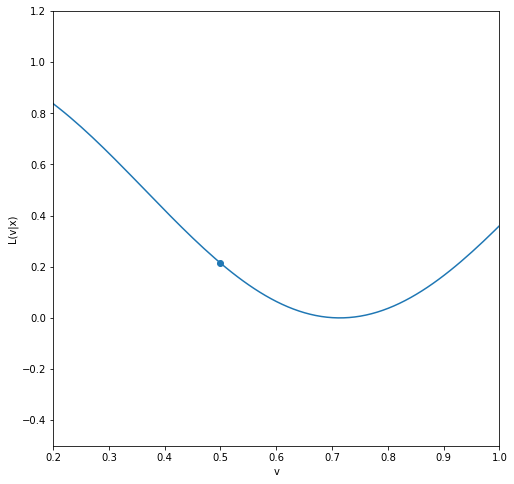

In [5]:
k=4.5
def f(x):
    return(np.sin(k * x +1.5) + 1) / 2
def fp(x):
    return k / 2* np.cos(k * x + 1.5)

n=1000
z = np.linspace(0, 10, n) 
w = [ f(zi) for zi in z ] 

x = 0.5
y = f(x)

figHill = plt.figure(figsize = (8, 8))
# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('v') 
plt.ylabel('L(v|x)') 
plt.plot(z, w)
plt.xlim((0.2,1))
plt.ylim((-0.5,1.2))

plt.show()



<br>


# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Hill-climbing* 
1. randomly choose direction and length to change $v$
2. stay if $L(v|x)$ got lower, else go back.

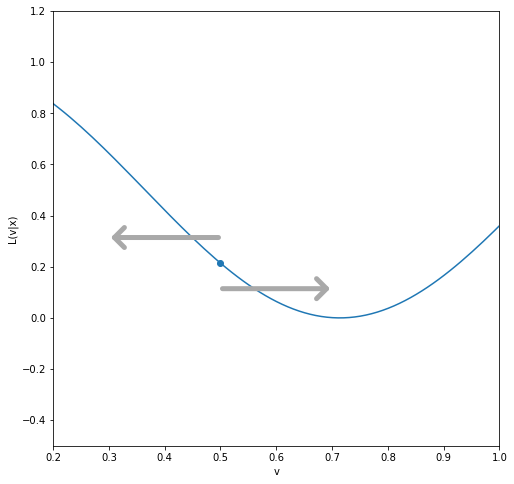

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import patches as mpatches

fig = plt.figure(figsize = (8, 8))
# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('v') 
plt.ylabel('L(v|x)') 
plt.plot(z, w)
plt.xlim((0.2,1))
plt.ylim((-0.5,1.2))

e = 0.1
d = 0.2

plt.annotate("",  
             xy=(x-d,y+e),  
             xytext=(x,y+e),
             arrowprops=
             dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=1.,
                                                head_width=1.),
                 color="darkgray", 
                 lw=5))
a=plt.annotate("",  
             xy=(x+d,y-e),  
             xytext=(x,y-e),
             arrowprops=
             dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=1.,
                                                head_width=1.),
                 color="darkgray", 
                 lw=5))



###### We want to be smarter!

# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Gradient descent*
<br>
<br>

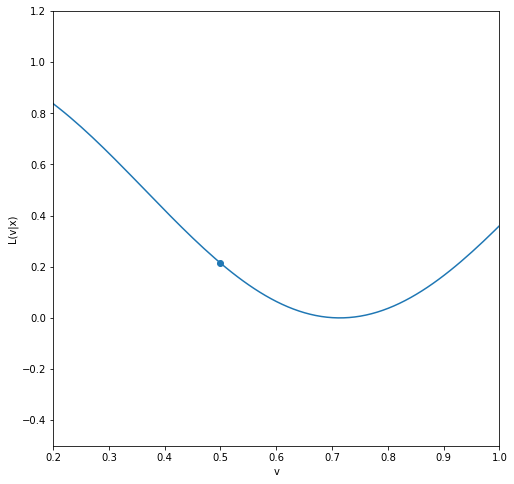

In [7]:
figHill

<br>
<br>


# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Gradient descent*
1. compute the derivative $\frac{dL(v|x)}{dv}$ to see which way *down* is
<br>
<br>
<br>
<br>

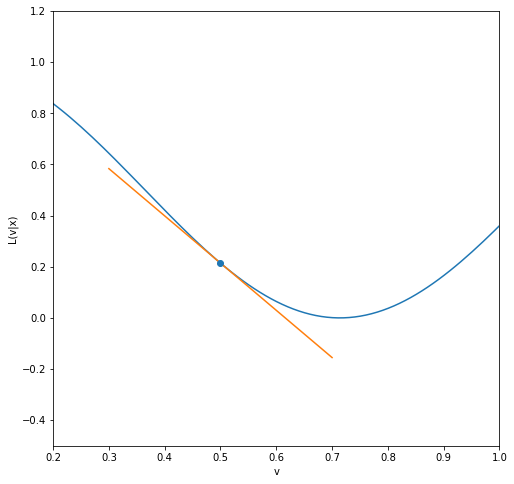

In [8]:
fig = plt.figure(figsize = (8, 8))

# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('v') 
plt.ylabel('L(v|x)') 
plt.plot(z, w)
plt.xlim((0.2,1))
plt.ylim((-0.5,1.2))

n=50
z1 = np.linspace(x-0.2, x+0.2, n) 
w1 = [ fp(x)*zi + (f(x)-fp(x)*x) for zi in z1 ] 
A=plt.plot(z1, w1)





<br>
<br>


# Gradient Descent
#### Optimization

Consider inverted hill-climbing in one dimension $v$, i.e., we want to find the minimum instead of the maximum.

#### *Gradient descent*
1. compute the derivative $\frac{dL(v|x)}{dv}$ to see which way *down* is
2. Take a reasonably long step in that direction, $v' = v-\eta\frac{dL(v|x)}{dv}$

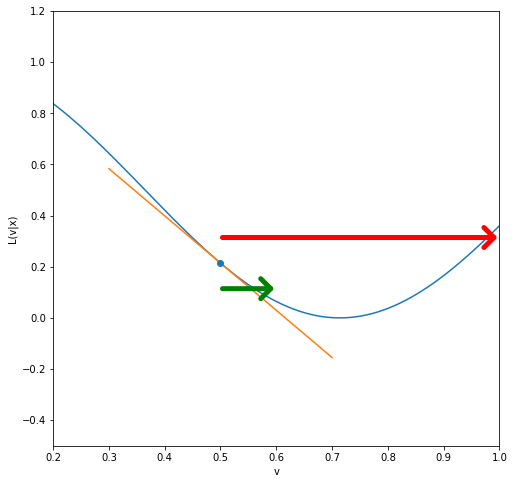

In [9]:
figGD = plt.figure(figsize = (8, 8))

# Create the plot 
plt.scatter(x, y, zorder=8)
plt.xlabel('v') 
plt.ylabel('L(v|x)') 
plt.plot(z, w)
plt.xlim((0.2,1))
plt.ylim((-0.5,1.2))

n=50
z1 = np.linspace(x-0.2, x+0.2, n) 
w1 = [ fp(x)*zi + (f(x)-fp(x)*x) for zi in z1 ] 
A=plt.plot(z1, w1)

e=0.1
d=0.5
plt.annotate("",  
             xy=(x+d,y+e),  
             xytext=(x,y+e),
             arrowprops=
             dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=1.,
                                                head_width=1.),
                 color="red", 
                 lw=5))
ignore=plt.annotate("",  
             xy=(x+e,y-e),  
             xytext=(x,y-e),
             arrowprops=
             dict(
                 arrowstyle=mpatches.ArrowStyle("->", 
                                                head_length=1.,
                                                head_width=1.),
                 color="green", 
                 lw=5))






$\eta$ is called the *learning rate*

# Gradient Descent in higher dimensions

Same thing really, but we have to have *partial derivatives* for each dimension, which makes it look more complicated. 

<img src="./assets/valley_with_ball.png" alt="valley" width="800"/>

Consider a 2-dimensional case. We will treat each dimension separately

1. Find the partial derivatives for both dimensions 
$$\begin{pmatrix}
\frac{\partial L(v_1,v_2|x)}{\partial v_1}\\
\frac{\partial L(v_1,v_2|x)}{\partial v_2}
\end{pmatrix}$$

2. Take a resonably long step
$\begin{eqnarray*}
\begin{pmatrix} v'_1\\ v'_2\end{pmatrix} &=& \begin{pmatrix}v_1-\eta\frac{\partial  L(x,w)}{\partial v_1} \\ v_2-\eta\frac{\partial L(x,v)}{\partial v_2} \end{pmatrix}
\end{eqnarray*}$

(A vector of partial derivatives is called a **gradient**)

# Gradient descent strategy 

 #### Algorithm
 1. Initialize weights and biases randomly $\sim N(0, \sigma^2)$
 2.  Loop for $M$ epochs or until convergence:
     - For each weight $w_{i,j}$ and each bias $b_j$ :
         1. Compute partial derivatives:  
         $\begin{eqnarray*}
         \frac{\partial L(w,b|x)}{\partial w_{i,j}}\\
         \frac{\partial L(w,b|x)}{\partial b_{j}}
         \end{eqnarray*}$
         2. Update:  
         $\begin{eqnarray*}
         w_{i,j} &=& w_{i,j} - \eta \frac{\partial L(w,b|x)}{\partial w_{i,j}}\\
         b_{j} &=& b_{j} - \eta \frac{\partial L(w,b|x)}{\partial b_{j}}
         \end{eqnarray*}$
 3. Return final weights and biases
         

## Summary Learning

### Loss function
\begin{eqnarray}
L(w,b|x) &=& \frac{1}{2}\sum_i\left(y_i-\hat{y}_i\right)^2\\
L(w,b) &=& \frac{1}{K}\sum_{k=1}^K  L(w,b|x^{(k)})
\end{eqnarray}
- Residual sum of squares (RSS)
- Mean squared error (MSE)

### Gradient descent

- "Clever hill-climbing" in several dimensions
- Change all variables $v\in (w,b)$ by taking a reasonable step (the learning rate) in opposite direction to the gradient 
\begin{equation}
v' = v-\eta \frac{\partial L(w,b|x)}{\partial v}
\end{equation}

**_For this to work, we need to be able to compute all $\frac{\partial L(w,b|x)}{\partial v}$ efficiently_**

# Activation functions revisited

#### Perceptron -- *step* activation 
- Pros
    - Clear classification (0/1)
- Why did the perceptron "fail"?
    - 1 layer $\Rightarrow$ linear classification
    - Not meaningfully differentiable
    - a requirement for *multilayer* ANN

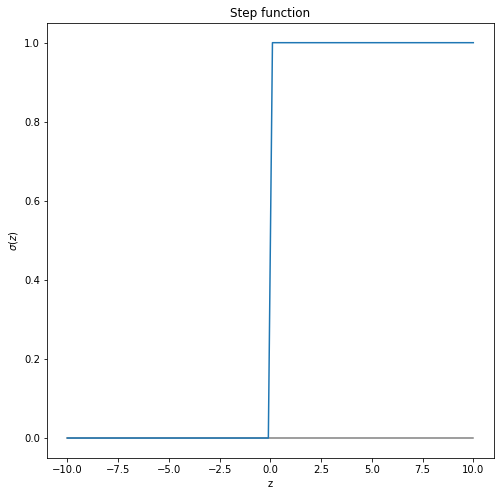

In [20]:
import numpy as np
import matplotlib.pyplot as plt


# Creating vectors x and  
z = np.linspace(-10, 10, 100) 
a = [ 0 if x<0 else 1 for x in z ]
b = [ 0 for x in z ]
fig = plt.figure(figsize = (8, 8)) 
# Create the plot 
plt.plot(z, a, zorder=8)
plt.plot(z,b, color="grey")
plt.title("Step function")
plt.xlabel('z') 
plt.ylabel('$\sigma(z)$') 
# Show the plot 
plt.show() 

# Activation functions revisited

#### Why not use the linear function
- Pros:
    - continuous output 
        - better output "resolution"
- Cons:
    - Not really "meaningfully" differentiable
    - Multilayer linear ann collapses into a single linear model

However, used in the output layer for regression problems!

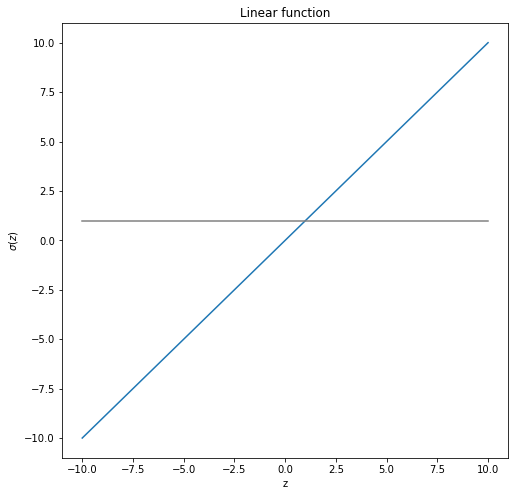

In [19]:
import numpy as np

# Creating vectors x and  
z = np.linspace(-10, 10, 100) 
b= [1 for x in z ]  

fig = plt.figure(figsize = (8, 8)) 
# Create the plot 
plt.plot(z, z)
plt.plot(z,b,color="grey")
plt.title("Linear function")
plt.xlabel('z') 
plt.ylabel('$\sigma(z)$') 
# Show the plot 
plt.show() 

# Activation functions revisited


### Sigmoid activation function
- Meaningfully differentiable
<br>

##### Intermediate between *step* and *linear*
- True for most activation functions
- Balance between pros and cons

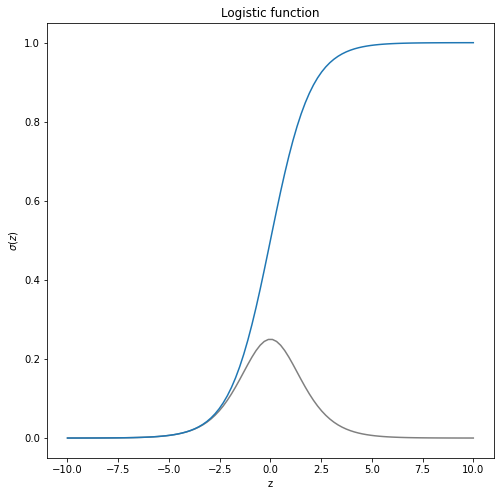

In [15]:

def sigma(x):
    return 1/(1+np.exp(-x))

# Creating vectors x and  
z = np.linspace(-10, 10, 100) 
a = [ sigma(x) for x in z ]
b = [ sigma(x)*(1-sigma(x)) for x in z ]
fig = plt.figure(figsize = (8, 8)) 
# Create the plot 
plt.plot(z, a, zorder=8)
plt.plot(z, b, color="grey")

plt.title("Logistic function")
plt.xlabel('z') 
plt.ylabel('$\sigma(z)$') 
# Show the plot 
plt.show() 